<a href="https://colab.research.google.com/github/CarloGiorgio/Machine-Learning/blob/master/Progetto_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf * # warning
!wget https://www.dropbox.com/s/grorylbv44zm4na/beta-beta-decay-identification.zip?dl=1 -O archive.zip
!unzip archive.zip
!7z x beta-beta-decay-identification/data_train.csv.zip -so > data_train.csv
!7z x beta-beta-decay-identification/labels_train.csv.zip -so > labels_train.csv
!rm -rf __MACOSX beta-beta-decay-identification archive.zip

--2020-06-16 13:47:27--  https://www.dropbox.com/s/grorylbv44zm4na/beta-beta-decay-identification.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/grorylbv44zm4na/beta-beta-decay-identification.zip [following]
--2020-06-16 13:47:28--  https://www.dropbox.com/s/dl/grorylbv44zm4na/beta-beta-decay-identification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f29d3c052547e710d57933739.dl.dropboxusercontent.com/cd/0/get/A5yfeXc5WHda1yFbVmY6cvmBh7Ke5POD-B__brffbopI7y4s5ZRP2FuPgxoembf6KuQJiTTsqzjz7NArtuCLK75ru4KCd7MataKk7gpHw9bSCJzkhE_UmLC22yUahv2Hulw/file?dl=1# [following]
--2020-06-16 13:47:28--  https://uc4f29d3c052547e710d57933739.dl.dropboxusercontent.com/cd/0/get/A5yfeXc5WHda1yFbVmY6cvmBh7Ke5POD-B__brffbop

In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm

In [0]:
data_train = pd.read_csv('data_train.csv')
labels_train = pd.read_csv('labels_train.csv')

In [0]:
def create_images(data, n_theta_bins=10, n_phi_bins=20, n_time_bins=6):
    labels = []
    images = []
    event_indexes = {}
    event_ids = np.unique(data['EventID'].values)
    
    # collect event indexes
    data_event_ids = data['EventID'].values
    for i in range(len(data)):
        i_event = data_event_ids[i]
        if i_event in event_indexes:
            event_indexes[i_event].append(i)
        else:
            event_indexes[i_event] = [i]
            
    # create images
    for i, i_event in enumerate(tqdm(event_ids)):
        event = data.iloc[event_indexes[i_event]]
        X = event[['Theta', 'Phi', 'Time']].values
        one_image, edges = np.histogramdd(X, density=False,
                                          bins=(n_theta_bins, n_phi_bins, n_time_bins))
        images.append(one_image)
        label = labels_train[labels_train["EventID"]==i_event]["Label"].values[0]
        labels.append(label)
    return (np.array(images), np.array(labels))

In [6]:
'''images, labels = create_images(data_train,
                               n_theta_bins=10, 
                               n_phi_bins=20, 
                               n_time_bins=6)'''

# === Pre-rendered data
import requests
import io

def retrieve_data(urls):
  data = []
  for url in tqdm(urls):
    response = requests.get(url)
    response.raise_for_status()
    data.append(np.load(io.BytesIO(response.content)))
  return data

images, labels = retrieve_data([
    "https://www.dropbox.com/s/zilveq4b7f1fdpz/images.npy?dl=1",
    "https://www.dropbox.com/s/6oue6rbyfcsatxg/labels.npy?dl=1"
])


100%|██████████| 2/2 [00:33<00:00, 16.98s/it]


In [7]:
print(images.shape)
print(labels.shape)

(80000, 10, 20, 6)
(80000,)


# Data manipulation

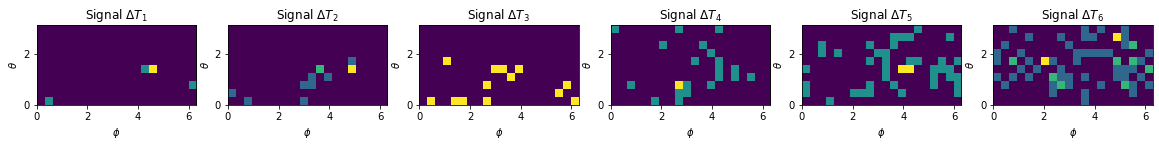

In [8]:
signal = images[labels == 1]
background = images[labels == 0]

sig = np.random.randint(0, signal.shape[0])
back = np.random.randint(0, background.shape[0])
plt.close()
fig=plt.figure(figsize=(20, 3))
for i in range(6):
  ax=fig.add_subplot(1, 6, i+1)
  ax.imshow(signal[sig][:, :, i],extent=[0,2*np.pi,0,np.pi])
  ind=str(i+1)
  ax.set_title(r'Signal $\Delta T_{%s}$'%ind)
  ax.set_xlabel(r'$\phi$')
  ax.set_ylabel(r'$\theta$')
#fig.savefig('signal.png')

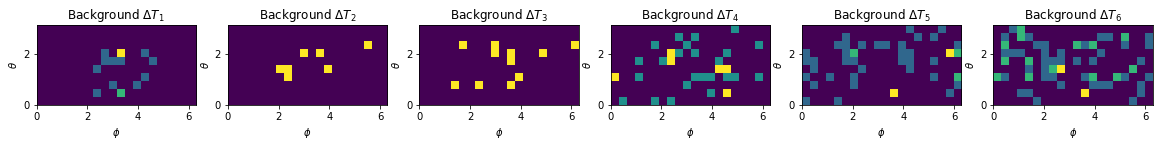

In [9]:
plt.close()
fig=plt.figure(figsize=(20, 3))
for i in range(6):
  ind=str(i+1)
  ax=fig.add_subplot(1, 6, i+1)
  ax.imshow(background[back][:, :, i],extent=[0,2*np.pi,0,np.pi])
  ax.set_title(r'Background $\Delta T_{%s}$'%ind)
  ax.set_xlabel(r'$\phi$')
  ax.set_ylabel(r'$\theta$')
#fig.savefig('back.pdf')

In [0]:
signal_ind=labels_train['Label']==1
signal_data=data_train['EventID']<39958
signal_train=data_train[signal_data]
bg_train=data_train[~signal_data]

[Text(0, 0.5, 'Occorrenze'),
 Text(0.5, 0, '$\\theta$ [rad]'),
 Text(0.5, 1.0, 'Istogramma delle \n occorrenze background')]

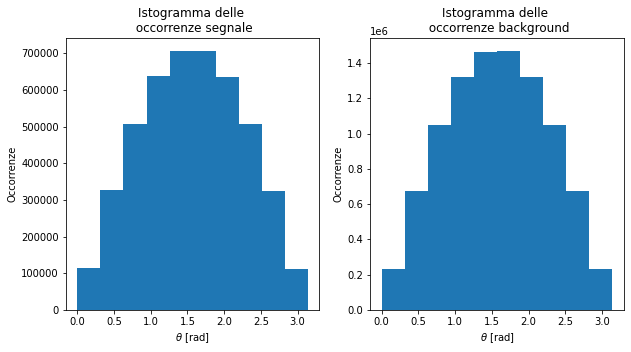

In [11]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].hist(signal_train['Theta'])
axs[0].set(xlabel=r'$\theta$ [rad]',ylabel=r'Occorrenze',
       title='Istogramma delle \n occorrenze segnale')
axs[1].hist(bg_train['Theta'])
axs[1].set(xlabel=r'$\theta$ [rad]',ylabel=r'Occorrenze',
       title='Istogramma delle \n occorrenze background')
#fig.savefig('hist_theta.pdf')

[Text(0, 0.5, 'Occorrenze'),
 Text(0.5, 0, '$\\phi$ [rad]'),
 Text(0.5, 1.0, 'Istogramma delle \n occorrenze background')]

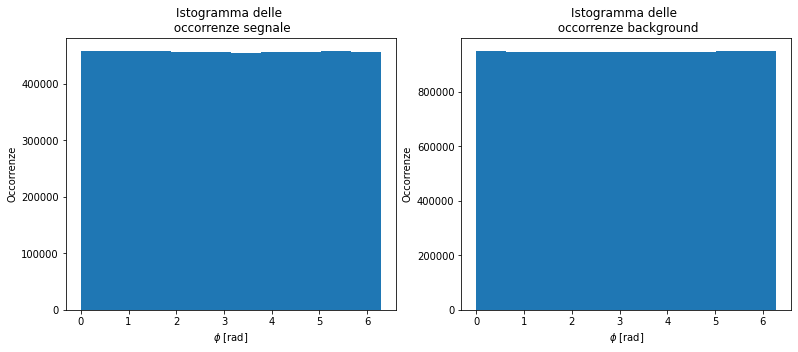

In [12]:
fig,axs=plt.subplots(1,2,figsize=(13,5))
axs[0].hist(signal_train['Phi'])
axs[0].set(xlabel=r'$\phi$ [rad]',ylabel=r'Occorrenze',
       title='Istogramma delle \n occorrenze segnale')
axs[1].hist(bg_train['Phi'])
axs[1].set(xlabel=r'$\phi$ [rad]',ylabel=r'Occorrenze',
       title='Istogramma delle \n occorrenze background')
#fig.savefig('hist_phi.pdf')

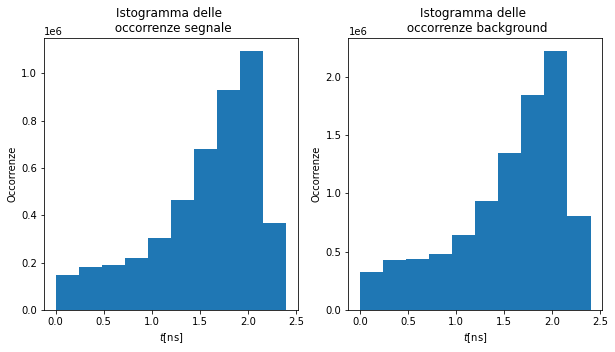

In [92]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].hist(signal_train['Time'])
axs[0].set(xlabel=r'$t$[ns]',ylabel=r'Occorrenze',
       title='Istogramma delle \n occorrenze segnale')
axs[1].hist(bg_train['Time'])
axs[1].set(xlabel=r'$t$[ns]',ylabel=r'Occorrenze',
       title='Istogramma delle \n occorrenze background')
fig.savefig('hist_time.pdf')

In [16]:
# Preparing TSNE
data = images.reshape((images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
index = np.random.randint(0, data.shape[0], 2000)
data = data[index]

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=700)
axs = tsne.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.189s...
[t-SNE] Computed neighbors for 2000 samples in 10.742s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.572477
[t-SNE] KL divergence after 250 iterations with early exaggeration: 125.058220
[t-SNE] KL divergence after 700 iterations: 3.307143


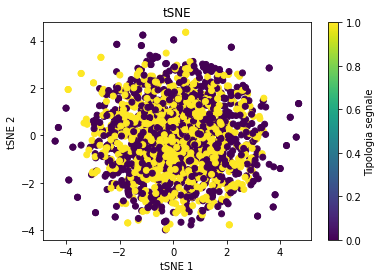

In [17]:
plt.figure()
plt.scatter(x = axs[:, 0], y = axs[:, 1], c=labels[index])
plt.colorbar(label='Tipologia segnale')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('tSNE')
plt.savefig('tsne_2000.pdf')

# NN training

In [0]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(images, labels, test_size=0.2)

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [22]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(64000, 10, 20, 6) (64000,)
(16000, 10, 20, 6) (16000,)


In [23]:
IMG_SHAPE = (10, 20, 6)

img_input = keras.Input(shape=IMG_SHAPE, name="D_Image_Input")
x = img_input

# === Primo blocco Convoluzionale
x = keras.layers.Conv2D(filters=8, kernel_size=(3, 5),name='Conv_1')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_1')(x)
x = layers.Dropout(0.11, name="DropOut_1")(x)

# === Secondo blocco Convoluzionale
x = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), name='Conv_2')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_2')(x)
x = layers.Dropout(0.2, name="DropOut_2")(x)

x = keras.layers.Flatten(name='Flatten')(x)

# === Layer densi
x = keras.layers.Dense(32, name='Dense_1')(x)
x = layers.Dropout(0.12, name="DropOut_5")(x)
x = keras.layers.ReLU(name='ReLU_dense_1')(x)

outputs = keras.layers.Dense(1, activation='sigmoid', name='Output')(x)

model = keras.Model(inputs=img_input, outputs=outputs, name='predictor')

# === Printout summary
model.summary()

Model: "predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D_Image_Input (InputLayer)   [(None, 10, 20, 6)]       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 8, 16, 8)          728       
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 16, 8)          32        
_________________________________________________________________
ReLU_1 (ReLU)                (None, 8, 16, 8)          0         
_________________________________________________________________
DropOut_1 (Dropout)          (None, 8, 16, 8)          0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 6, 14, 16)         1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 14, 16)         64

In [24]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath='cnn_best',
        monitor='val_accuracy',
        save_weights_only=True, 
        save_best_only=True,
        save_freq='epoch')

LR_ST=1e-3

def lr_decay(epoch):
  start = 10
  if epoch < start:
    return LR_ST
  else:
    return LR_ST * tf.math.exp(0.2 * (start - epoch))

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_decay)

callbacks = [ 
             lr_scheduler,
             model_checkpoint,
             keras.callbacks.EarlyStopping(monitor='loss', patience=5)
             ]      

model.compile(loss="binary_crossentropy", optimizer='adam', 
              metrics=[
                       "accuracy",
                       keras.metrics.AUC(name='auc')
                       ])
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=512, 
          epochs=50, shuffle=True, verbose=1, callbacks=callbacks)

Epoch 1/50
113/113 [==============================] - 1s 13ms/step - loss: 0.7001 - accuracy: 0.5124 - auc: 0.5194 - val_loss: 0.6899 - val_accuracy: 0.5138 - val_auc: 0.5584 - lr: 0.0010
Epoch 2/50
113/113 [==============================] - 1s 9ms/step - loss: 0.6295 - accuracy: 0.6382 - auc: 0.6985 - val_loss: 1.1376 - val_accuracy: 0.5163 - val_auc: 0.7457 - lr: 0.0010
Epoch 3/50
113/113 [==============================] - 1s 9ms/step - loss: 0.5543 - accuracy: 0.7220 - auc: 0.7912 - val_loss: 0.6408 - val_accuracy: 0.6559 - val_auc: 0.7968 - lr: 0.0010
Epoch 4/50
113/113 [==============================] - 1s 9ms/step - loss: 0.5385 - accuracy: 0.7327 - auc: 0.8046 - val_loss: 0.5406 - val_accuracy: 0.7233 - val_auc: 0.8128 - lr: 0.0010
Epoch 5/50
113/113 [==============================] - 1s 9ms/step - loss: 0.5278 - accuracy: 0.7399 - auc: 0.8138 - val_loss: 0.5239 - val_accuracy: 0.7398 - val_auc: 0.8183 - lr: 0.0010
Epoch 6/50
113/113 [==============================] - 1s 9ms/ste

In [0]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

AUC=history.history['auc']
val_AUC=history.history['val_auc']
epochs_range = range(1, len(accuracy) + 1)

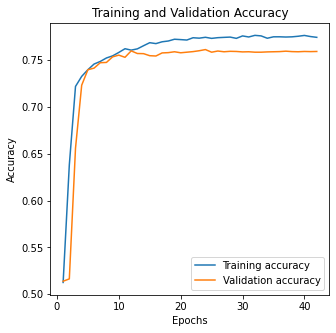

In [102]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(epochs_range, accuracy, label='Training accuracy')
ax.plot(epochs_range, val_accuracy, label='Validation accuracy')
ax.legend(loc=4)
ax.set_title('Training and Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
fig.savefig('cnn_acc.pdf')

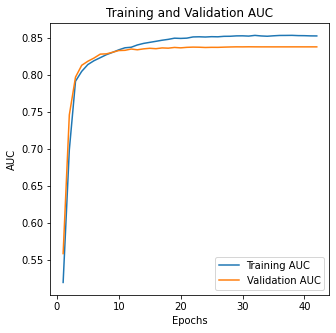

In [100]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(epochs_range, AUC, label='Training AUC')
ax.plot(epochs_range, val_AUC, label='Validation AUC')
ax.legend(loc=4)
ax.set_title('Training and Validation AUC')
ax.set_xlabel('Epochs')
ax.set_ylabel('AUC')
fig.savefig('cnn_auc.pdf')

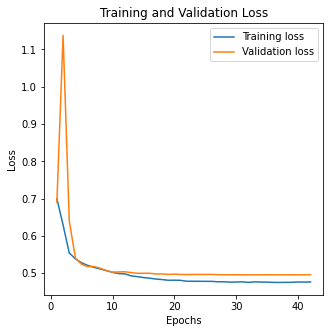

In [95]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(epochs_range, loss, label='Training loss')
ax.plot(epochs_range, val_loss, label='Validation loss')
ax.legend(loc=1)
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
#fig.savefig('cnn_loss.pdf')

Text(0.5, 1.0, 'ROC curve')

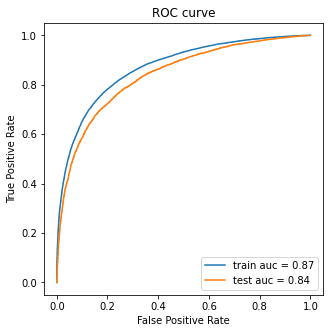

In [30]:
# Building ROC curves

from sklearn.metrics import roc_auc_score, roc_curve

data = ((X_train, Y_train),
        (X_test, Y_test)
        )

fig,ax=plt.subplots(figsize=(5,5))
for i, dataset in enumerate(['train', 'test']):
  pred = model.predict(data[i][0], verbose=0)
  auc = roc_auc_score(data[i][1], pred)
  fpr, tpr, thr =roc_curve(data[i][1], pred)
  ax.plot(fpr, tpr, label = f'{dataset} auc = {auc:.2f}' )
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
ax.set_title('ROC curve')
#fig.savefig('cnn_roc.pdf')
#plt.show()

# CNN Study

['D_Image_Input', 'Conv_1', 'batch_normalization', 'ReLU_1', 'DropOut_1', 'Conv_2', 'batch_normalization_1', 'ReLU_2', 'DropOut_2', 'Flatten', 'Dense_1', 'DropOut_5', 'ReLU_dense_1', 'Output']


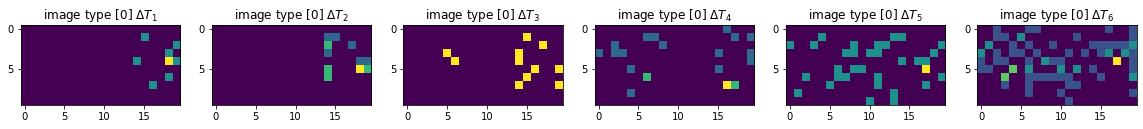

<Figure size 1440x720 with 0 Axes>

In [32]:
#salviamo i nomi di tutti i layers della rete nella lista layer_names
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
print(layer_names)

# estraiamo gli output da tutti i 20 layers della nostra rete
layer_outputs = [layer.output for layer in model.layers[:22]]

# instanziamo un semplice modello keras che prende l'immagine in input e restituisce 
# tali output (le attivazioni)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)


index = np.random.randint(0, X_test.shape[0], 1)
immagine = X_test[index]

plt.figure(figsize=(20, 10))
for i in range(6):
  plt.subplot(1, 6, i+1)
  plt.imshow(immagine[0][:, :, i])
  plt.title(f'image type {Y_test[index]} $\Delta T_{i+1}$')
plt.show()
plt.figure(figsize=(20, 10))

# e estraiamone le attivazioni
activations = activation_model.predict(immagine)

(1, 8, 16, 8)


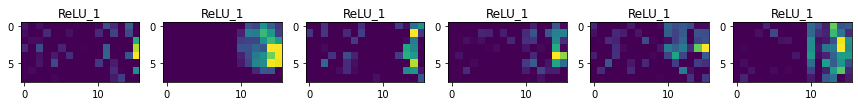

In [33]:
# grafichiamo gli output per il primo layer convoluzionale (è il layer numero 
# 3 (dopo ReLU) nel nostro modello)

layer = 3
first_layer_activation = activations[layer]
print(first_layer_activation.shape)

k = 0
plt.figure(figsize=(20, 10))
for i in range(6):
  plt.subplot(1, 8, k + 1)
  plt.imshow(first_layer_activation[0, :, :, k], cmap='viridis') 
  plt.title(layer_names[layer])
  k = k + 1

Filtri layer convoluzionale:  Conv_1


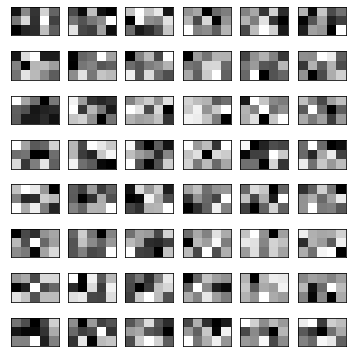

Filtri layer convoluzionale:  Conv_2


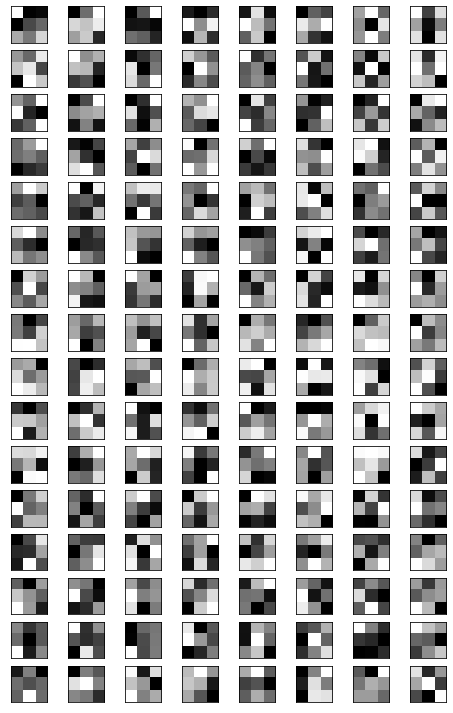

In [34]:
for layerc in ['Conv_1', 'Conv_2']:
    print('Filtri layer convoluzionale: ', layerc)
    # pesi del layer selezionato:
    filters, biases = model.get_layer(layerc).get_weights()
    # numero dei filtri 
    n_filters = filters.shape[3]
    # numero canali 
    n_channels = filters.shape[2]
    # normalizzazione in [0,1] per rendere più chiaro il plot
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    k = 1
    plt.figure(figsize=(n_channels, n_filters*0.8), frameon=False)
    for i in range(n_filters):
        f = filters[:, :, :, i]
        # plot del filtro per ogni canale RGB
        for j in range(n_channels):
            ax = plt.subplot(n_filters, n_channels, k)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:, :, j], cmap='gray')
            k = k + 1

    plt.show()

# Random Forest

In [0]:
data = images.reshape((images.shape[0], -1))

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
scaler = StandardScaler().fit(data)
data = scaler.transform(data)

# === Riduzione dimensionale del set
pca_components = 12
pca = PCA(n_components=pca_components)
data = pca.fit_transform(data)

print(data.shape)

# === Splitting del dataset
(data_X_train, data_X_test, data_Y_train, data_Y_test) = train_test_split(data, labels, test_size=0.2)

In [0]:
pca_variance=pca.explained_variance_ratio_
print(pca_variance.shape)

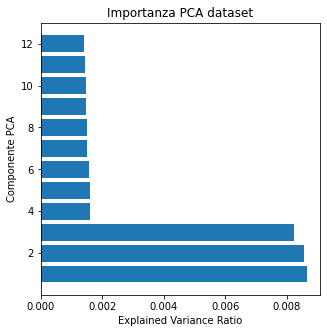

In [99]:
plt.close()
fig, ax = plt.subplots(figsize=(5,5))

ax.barh(np.arange(1,13),pca_variance, align='center')
ax.set(ylabel='Componente PCA',xlabel='Explained Variance Ratio',
       title='Importanza PCA dataset')

fig.savefig('pca.pdf')

In [0]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# === Valore del numero di alberi 
min_estimators = 100
max_estimators = 1501
classifier = RandomForestClassifier
estimators_auc_score_results1 = []
n_estimator_range=np.arange(min_estimators, max_estimators, 100)

max_depth=50 

m=len(n_estimator_range)

# ==== Metrics
RFC_train_accuracy=np.zeros(m)
RFC_test_accuracy=np.zeros(m)
RFC_train_AUC_accuracy=np.zeros(m)
RFC_test_AUC_accuracy=np.zeros(m)
run_time=np.zeros(m)

print_flag=True

    # Creazione del classificatore
myRF_clf = classifier(
    n_estimators=min_estimators,
    max_depth=max_depth,
    n_jobs = -1
    )
    
for j, n_estimator in enumerate(n_estimator_range):
        
    print('\nN of estimators: %i, Max Depth: %i'%(n_estimator,max_depth))
        
    start_time = time()
    myRF_clf.set_params(n_estimators=n_estimator)
    myRF_clf.fit(data_X_train, data_Y_train)
    run_time[j] = time() - start_time

    # check accuracy
    RFC_train_accuracy[j]=myRF_clf.score(data_X_train,data_Y_train)

    RFC_train_AUC_accuracy[j]=roc_auc_score(
        data_Y_train, myRF_clf.predict_proba(data_X_train)[:, 1])
    
    RFC_test_accuracy[j]=myRF_clf.score(data_X_test,data_Y_test)

    RFC_test_AUC_accuracy[j]=roc_auc_score(
        data_Y_test, myRF_clf.predict_proba(data_X_test)[:, 1])
    
    estimators_auc_score_results1.append(RFC_test_AUC_accuracy[j])
    if print_flag:
        result = [run_time[j], RFC_train_accuracy[j],
                  RFC_train_AUC_accuracy[j], RFC_test_accuracy[j],
                  RFC_test_AUC_accuracy[j]]

        print('{0:<15}{1:<15}{2:<15}{3:<15}{4:<15}'.format(
            "time (s)","train score", "train AUC", "test score", "test AUC" ))
        
        print('{0:<15.4f}{1:<15.4f}{2:<15.4f}{3:<15.4f}{4:<15.4f}'.format(*result))
            

In [0]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(n_estimator_range, estimators_auc_score_results1)
#ax.plot(n_estimator_range, RFC_train_AUC_accuracy.reshape(-1))
ax.set_xlabel('Numero estimatori')
ax.set_ylabel('Validazione AUC')
ax.set_title('Andamento AUC in funzione del numero di estimatori')
#fig.savefig('rand_n_est.pdf')

In [0]:
warnings.filterwarnings("ignore")
# === Testiamo ora diversi valori per max_depth, che definisce la profondità dell'albero

# === Utilizziamo n_estimators = 1100, valore che risulta nel test tra i migliori risultati
# === senza rallentare eccessivamente l'esecuzione della Random Forest

# === Valore della profondità degli  alberi 
min_dep = 10
max_dep = 151
depth_auc_score_results = []

max_depth_range = np.arange(min_dep, max_dep, 10)

n_estimator = 1100

# ==== Metrics
RFC_train_accuracy=np.zeros(m)
RFC_test_accuracy=np.zeros(m)
RFC_train_AUC_accuracy=np.zeros(m)
RFC_test_AUC_accuracy=np.zeros(m)
run_time=np.zeros(m)

print_flag=True


    # Creazione del classificatore
myRF_clf = classifer(
    n_estimators=1100,
    max_depth=min_dep,
    n_jobs = -1
    )
    
for j, max_dept in enumerate(max_depth_range):
        
    print('\nN of estimators: %i, Max Depth: %i'%(n_estimator,max_dept))
        
    start_time = time()
    myRF_clf.set_params(max_depth=max_dept)
    myRF_clf.fit(data_X_train, data_Y_train)
    run_time[j] = time() - start_time

    # check accuracy
    RFC_train_accuracy[j]=myRF_clf.score(data_X_train,data_Y_train)

    RFC_train_AUC_accuracy[j]=roc_auc_score(
        data_Y_train, myRF_clf.predict_proba(data_X_train)[:, 1])
    
    RFC_test_accuracy[j]=myRF_clf.score(data_X_test,data_Y_test)

    RFC_test_AUC_accuracy[j]=roc_auc_score(
        data_Y_test, myRF_clf.predict_proba(data_X_test)[:, 1])
    
    depth_auc_score_results.append(RFC_test_AUC_accuracy[j])

    if print_flag:
        result = (run_time[j], RFC_train_accuracy[j],
                  RFC_train_AUC_accuracy[j],
                  RFC_test_accuracy[j], RFC_test_AUC_accuracy[j])
        
        print('{0:<15}{1:<15}{2:<15}{3:<15}{4:<15}'.format(
            "time (s)","train score", "train AUC", "test score", "test AUC" ))
        print('{0:<15.4f}{1:<15.4f}{2:<15.4f}{3:<15.4f}{4:<15.4f}'.format(*result))

In [0]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(max_depth_range, depth_auc_score_results)
ax.set_xlabel('Profondità massima')
ax.set_ylabel('Validazione AUC')
ax.set_title('Andamento AUC in funzione della profondità massima')

In [91]:
myRF_clf = classifier(n_estimators = 1100, max_depth = 40, n_jobs = -1)
print('\nN of estimators: %i, Max Depth: %i'%(1100, 40))

myRF_clf.fit(data_X_train, data_Y_train)


RFC_train_accuracy_f=myRF_clf.score(data_X_train,data_Y_train)

RFC_train_AUC_accuracy_f=roc_auc_score(
    data_Y_train, myRF_clf.predict_proba(data_X_train)[:, 1])

RFC_test_accuracy_f=myRF_clf.score(data_X_test,data_Y_test)

RFC_test_AUC_accuracy_f=roc_auc_score(
    data_Y_test,myRF_clf.predict_proba(data_X_test)[:, 1])

result = (RFC_train_accuracy_f,
          RFC_train_AUC_accuracy_f,
          RFC_test_accuracy_f, RFC_test_AUC_accuracy_f)

print('{0:<15}{1:<15}{2:<15}{3:<15}'.format(
    "train score", "train AUC", "test score", "test AUC" ))

print('{0:<15.4f}{1:<15.4f}{2:<15.4f}{3:<15.4f}'.format(*result))

train score    train AUC      test score     test AUC       
1.0000         1.0000         0.7912         0.8774         
